In [81]:
import pandas as pd         #Normal Libraries
import numpy as np

import matplotlib.pyplot as plt       #Libraries for visualization of data
import seaborn as sns

from sklearn.model_selection import train_test_split           #For Model instace and training/Testing
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score      #Evalution of Model

import warnings                                           #To ignore warnings in Output
warnings.filterwarnings('ignore')

import pickle                                             #To transport or Create pickle file for model
import json                                               # To transport or create independent featurs to VS code

## 1. Project Statement

In [2]:
# To create to model to predict the correct insurance for a members

## 2. Data Gathering

In [3]:
#Client will provide data or give limited access to databases.

#In this case CSV file we are using
# medical_insurance.csv

## 3. EDA(Exploratory Data Analysis)

In [4]:
df = pd.read_csv('medical_insurance.csv')
df.shape

(1338, 7)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 1. age

In [8]:
df.describe()                                               #No big difference between mean & 50%(median)

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: >

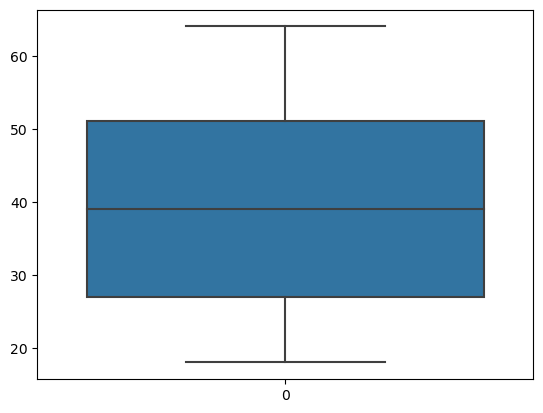

In [9]:
sns.boxplot(df['age'])

<Axes: >

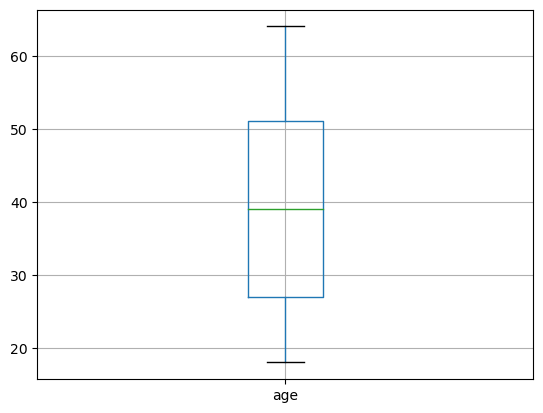

In [10]:
df.boxplot('age')                                          #No outliers present 

In [11]:
# No need to change anything in age feature

### 2. sex

In [12]:
df['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [13]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [14]:
df['sex'].replace({'male':1,'female':0},inplace=True)         #Value replaced with 0 & 1

In [15]:
df.head()          #To check whether replced or not

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


### 3. bmi

<Axes: >

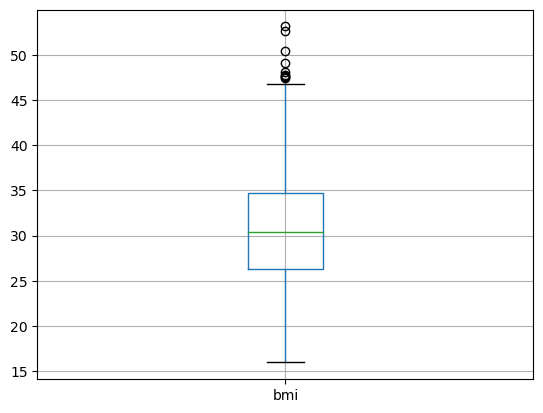

In [16]:
df.boxplot('bmi')

<Axes: >

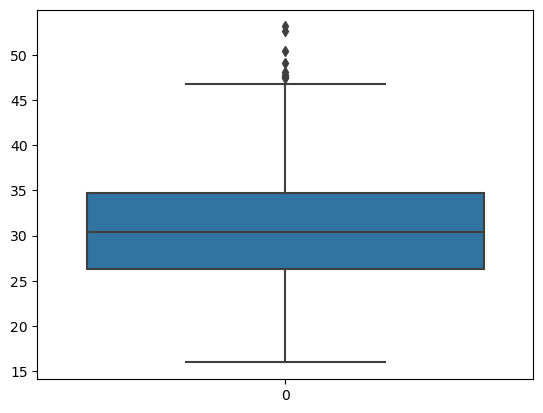

In [17]:
sns.boxplot(df['bmi'])

In [18]:
q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)

IQR = q3-q1

upper_limit = q3 + 1.5*IQR
lower_limit = 1 

In [19]:
df[df['bmi']>upper_limit]

,age,sex,bmi,children,smoker,region,charges
116,58,1,49.06,0,no,southeast,11381.32540
286,46,0,48.07,2,no,northeast,9432.92530
401,47,1,47.52,1,no,southeast,8083.91980
543,54,0,47.41,0,yes,southeast,63770.42801
847,23,1,50.38,1,no,southeast,2438.05520
860,37,0,47.60,2,yes,southwest,46113.51100
1047,22,1,52.58,1,yes,southeast,44501.39820
1088,52,1,47.74,1,no,southeast,9748.91060
1317,18,1,53.13,0,no,southeast,1163.46270


In [20]:
df['bmi'] = np.where(df['bmi']> upper_limit, df['bmi'].median(), df.bmi)

### 4.children

In [21]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

### 5. smoker

In [22]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [23]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [24]:
df['smoker'].replace({'yes':0,'no':1},inplace=True)
df.head()                #To check values replaced or not

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,southwest,16884.92400
1,18,1,33.770,1,1,southeast,1725.55230
2,28,1,33.000,3,1,southeast,4449.46200
3,33,1,22.705,0,1,northwest,21984.47061
4,32,1,28.880,0,1,northwest,3866.85520


### 6. region

In [25]:
df['region']

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [26]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [27]:
df = pd.get_dummies(df, columns=['region'])
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,0,16884.92400,0,0,0,1
1,18,1,33.770,1,1,1725.55230,0,0,1,0
2,28,1,33.000,3,1,4449.46200,0,0,1,0
3,33,1,22.705,0,1,21984.47061,0,1,0,0
4,32,1,28.880,0,1,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,10600.54830,0,1,0,0
1334,18,0,31.920,0,1,2205.98080,1,0,0,0
1335,18,0,36.850,0,1,1629.83350,0,0,1,0
1336,21,0,25.800,0,1,2007.94500,0,0,0,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [29]:
#All fields are in numrical data

## 4. Model 

### 1. Train Test split

In [30]:
x = df.drop('charges',axis=1)
x.head(1)

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,0,0,0,0,1


In [31]:
y = df['charges']
y.head(3)

0    16884.9240
1     1725.5523
2     4449.4620
Name: charges, dtype: float64

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=2)

### 2. Model Training

In [33]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### 3.Evaluation

In [34]:
#Testing data Evalution
def evaluation(model, ind_var,act):
    pred = model.predict(ind_var)
    
    mse = mean_squared_error(act, pred)
    print('MSE :',mse)
    
    rmse = np.sqrt(mse)
    print('RMSE :',rmse)
    
    mae = mean_absolute_error(act,pred)
    print('MAE :',mae)
    
    r2_val = r2_score(act,pred)
    print('R-squared Value :',r2_val)
    
print('Testing Data Evalution'.center(50,'*'))
evaluation(model, x_test, y_test)

print()

print('Training Data Evalution'.center(50,'*'))
evaluation(model, x_train, y_train)

**************Testing Data Evalution**************
MSE : 37943038.06659234
RMSE : 6159.792047349679
MAE : 4222.1696030187795
R-squared Value : 0.7473508749250468

*************Training Data Evalution**************
MSE : 36470871.98160082
RMSE : 6039.111853708359
MAE : 4131.796882463349
R-squared Value : 0.7494730816338498


### Testing on single row

In [36]:
x.head(1).T

,0
age,19.0
sex,0.0
bmi,27.9
children,0.0
smoker,0.0
region_northeast,0.0
region_northwest,0.0
region_southeast,0.0
region_southwest,1.0


In [37]:
x.head(1).values

array([[19. ,  0. , 27.9,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ]])

In [45]:
age = 24
sex = 'male'
bmi = 26.5
children = 2
smoker = 'no'
region = 'northeast'

# charges= ? 

In [40]:
test_array = np.array([24. ,  1. , 26.5,  2. ,  1. ,  1. ,  0. ,  0. ,  0. ],ndmin=2)

In [41]:
model.predict(test_array)

C:\Users\Labhade\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4245.65771633])

In [42]:
project_data = {'sex':{'male':1, 'female':0},
                'smoker':{'yes': 0, 'no':1}}
project_data

{'sex': {'male': 1, 'female': 0}, 'smoker': {'yes': 0, 'no': 1}}

In [44]:
project_data['sex']['male']

1

In [49]:
project_data['smoker'][smoker]

1

In [51]:
column_names = x.columns
column_names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [52]:
region_val = 'region_'+region
region_val

'region_northeast'

In [54]:
list(column_names).index(region_val)

5

In [55]:
len(x.columns)

9

In [56]:
x.shape[1]

9

In [68]:
project_data = {'sex':{'male':1, 'female':0},
                'smoker':{'yes': 0, 'no':1},
                 'columns' :list(column_names)}
project_data

{'sex': {'male': 1, 'female': 0},
 'smoker': {'yes': 0, 'no': 1},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [63]:
x.head(1).T

,0
age,19.0
sex,0.0
bmi,27.9
children,0.0
smoker,0.0
region_northeast,0.0
region_northwest,0.0
region_southeast,0.0
region_southwest,1.0


In [74]:
test_array = np.zeros(x.shape[1])
test_array[0] = age
test_array[1] = project_data['sex'][sex]
test_array[2] = bmi
test_array[3] = children
test_array[4] = project_data['smoker'][smoker]

region_val = 'region_' + region
region_index = project_data['columns'].index(region_val)
# region_index
test_array[region_index] = 1
test_array


array([24. ,  1. , 26.5,  2. ,  1. ,  1. ,  0. ,  0. ,  0. ])

In [80]:
result = model.predict([test_array])
print(f'Charges for Medical Insurance are : Rs. {round(result[0],2)}')

Charges for Medical Insurance are : Rs. 4245.66


C:\Users\Labhade\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### To save file for VS code Purpose

In [82]:
with open('Linear_model.pkl', 'wb') as f:
    pickle.dump(model,f)

In [83]:
with open('project_data.json', 'w') as f:
    json.dump(project_data,f)